## Aluno: Fernando Gomes Papi

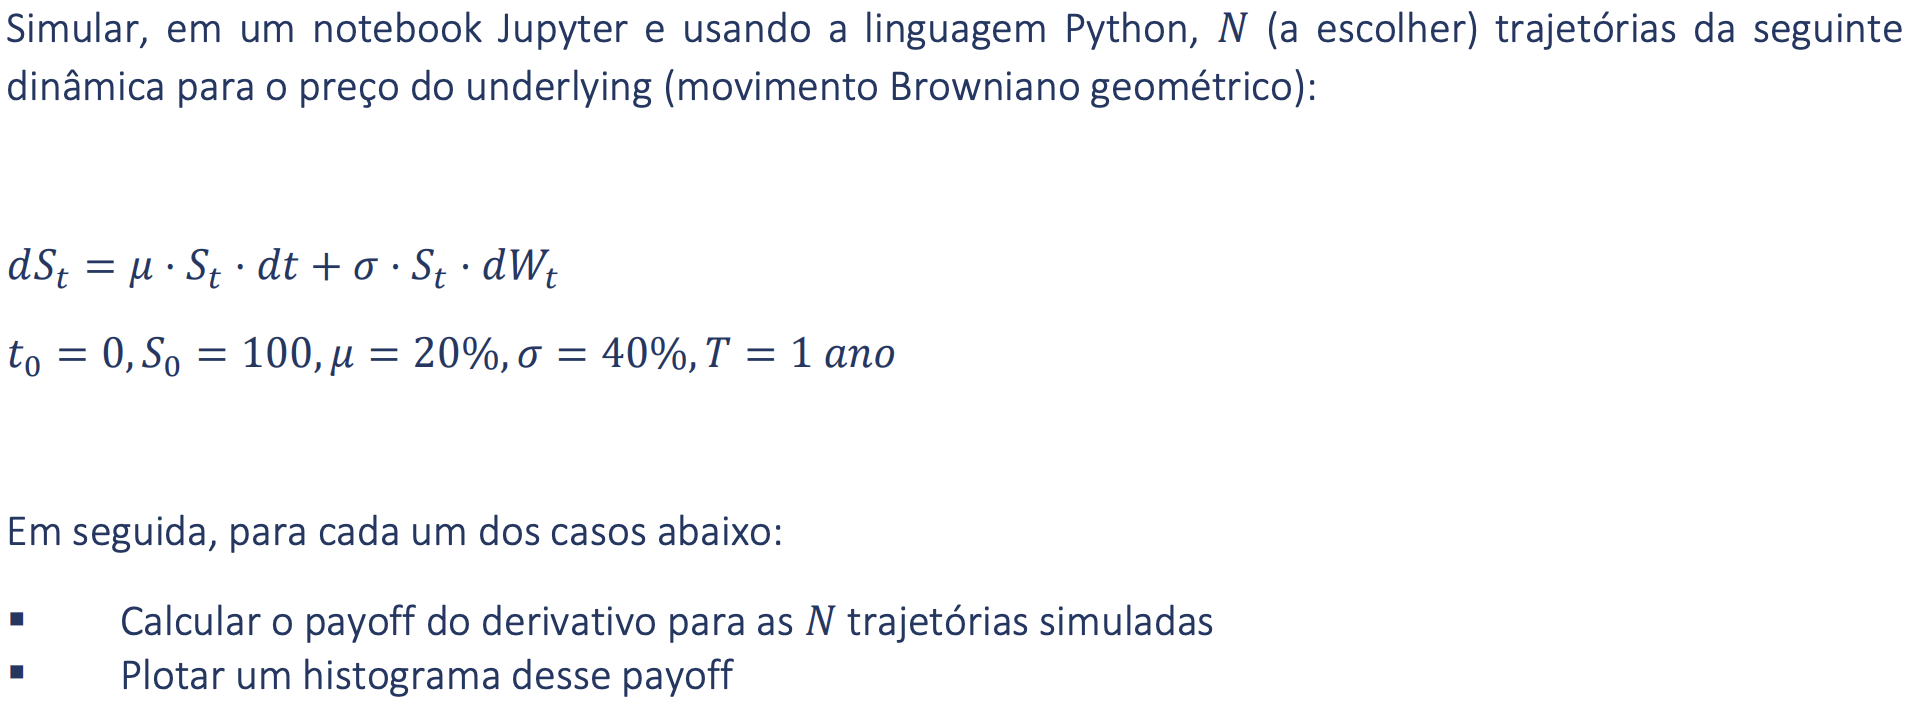

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameters
mu = 0.2      # Expected drift or mean return
sigma = 0.4   # Volatility
S0 = 100      # Initial asset price
T = 1 # Total time in years
dt = 1/365    # Time step (daily)

In [3]:
def plot_histogram(payoffs, title):
    # Set the style for the plot (optional)
    plt.figure(figsize=(8,8))
    sns.set(style="whitegrid")
    
    # Create a beautiful histogram
    sns.histplot(payoffs, kde=True, color='blue', bins=50)
    max_h = max(np.histogram(payoffs, bins=50)[0])
    plt.plot([np.mean(payoffs),np.mean(payoffs)], [0, max_h], c='orangered', ls='--', lw=3, zorder=4)
    plt.annotate(f'E(x)={np.mean(payoffs ):.2f}\n', (np.mean(payoffs), max_h),
            textcoords="offset points",
            xytext=(10,0), ha='left', va='top',
            bbox=dict(boxstyle='round, pad=0.2',
            edgecolor='black', facecolor='wheat', alpha=1))
    # Add labels and a title (customize as needed)
    plt.xlabel("Payoff")
    plt.ylabel("Payoff Count")
    plt.title(title)
    
    # Show the plot
    plt.show()

In [4]:
from aleatory.processes import GBM

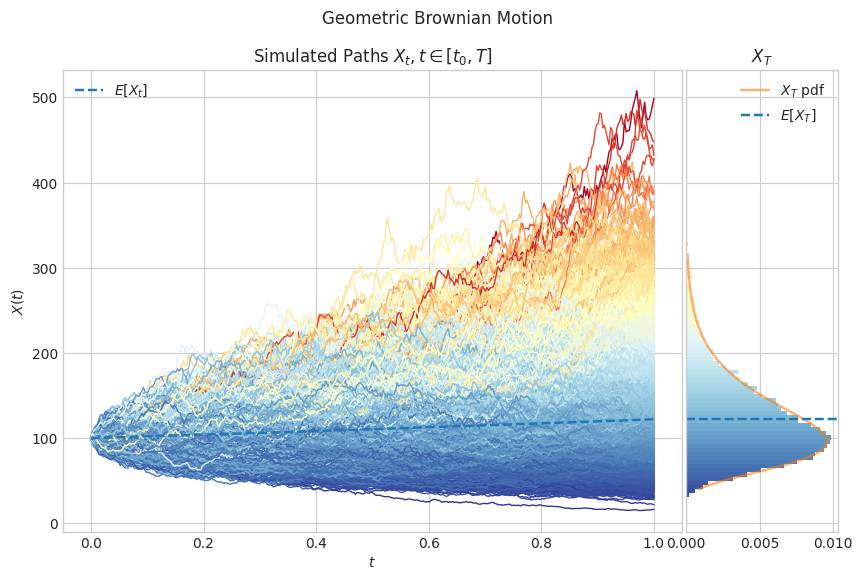

In [5]:
gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)
fig_kw = {'figsize':(10,6)}
fig = gbm.draw(envelope=True, n = 365, N=10000 ,**fig_kw)

In [6]:
# all paths as a dataframe where rows are t and columns are each price path
gbm_paths_df = pd.DataFrame(np.array(gbm.paths).T)
gbm_paths_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.767821,101.045378,101.952096,102.784306,102.296844,100.669675,100.008902,101.145852,100.180548,100.590491,...,101.173382,102.776113,99.850814,100.500486,102.046178,98.668831,100.430474,105.289785,102.137763,99.969927
2,102.055176,102.288753,103.365699,101.139425,103.033046,102.267438,98.975909,104.451640,98.124568,104.971190,...,100.709795,106.167640,101.107208,101.400151,103.868627,101.332185,100.084890,103.396679,101.364065,101.434532
3,102.792150,102.077693,107.280163,102.871418,103.487719,101.290681,96.317436,104.301055,95.098615,104.981777,...,100.070316,108.459412,101.020612,101.404452,101.653985,100.080470,99.408315,100.975695,101.543996,105.635321
4,101.929994,100.930843,105.395324,101.491646,104.296203,101.272851,96.787276,105.821808,95.519033,107.957722,...,100.239498,108.431984,101.875816,102.238192,99.003299,102.523518,101.617389,97.236744,100.908234,104.301782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,130.179880,74.060844,242.347372,122.568232,195.542073,152.875577,82.679737,157.088354,107.773363,112.443017,...,59.959217,82.369210,251.420307,100.397096,77.523077,66.886875,147.547056,268.098094,116.853078,155.220782
361,132.574998,71.717320,238.074426,122.451509,192.559266,153.106482,81.498385,156.235990,105.796736,114.159967,...,59.797022,81.193207,244.567923,98.177745,76.485673,68.674717,147.366717,264.967759,115.478862,151.059400
362,134.897256,69.903394,243.240525,119.833667,184.707459,156.656534,85.708241,160.887790,106.959580,112.333218,...,59.804432,79.509063,250.581391,97.109547,77.241780,68.641386,146.359325,260.696426,118.725788,148.919193
363,136.302154,70.022106,246.616737,121.345204,185.805364,158.885123,84.460278,160.399093,107.741440,111.317286,...,59.876033,80.247873,252.040440,98.864497,78.916945,67.626280,142.734407,259.314052,115.877263,147.948828


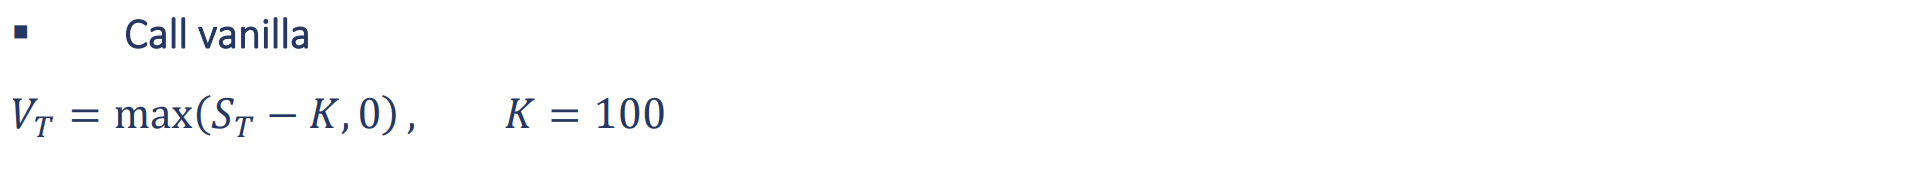

In [7]:
K = 100 # strike price

def payoff_call_vanilla(final_price, strike):
    return max(final_price - strike, 0)

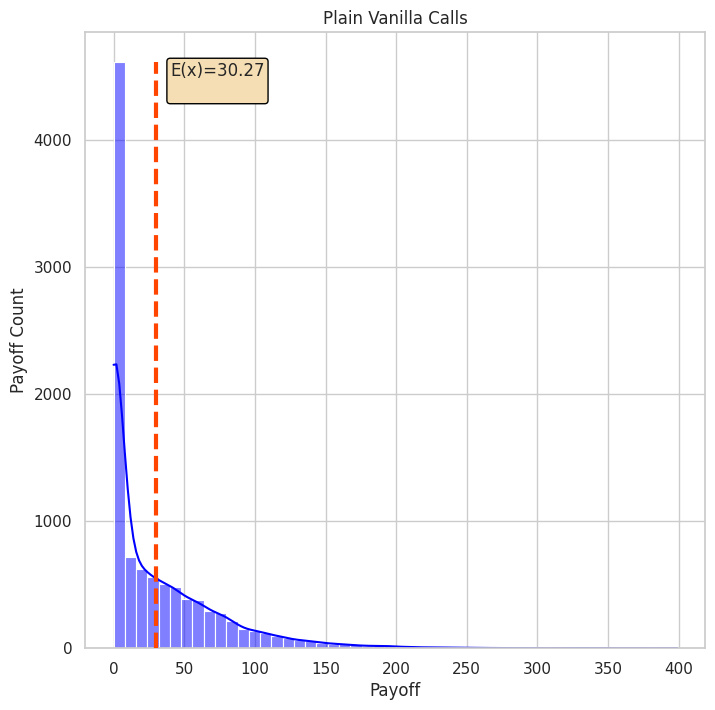

In [8]:
# final value of each price path
final_values = gbm_paths_df.iloc[-1]

# calculate all payoffs for vanilla call options
payoffs_vanilla = final_values.apply(lambda x: payoff_call_vanilla(x, K))
# plot histogram
plot_histogram(payoffs_vanilla, 'Plain Vanilla Calls')

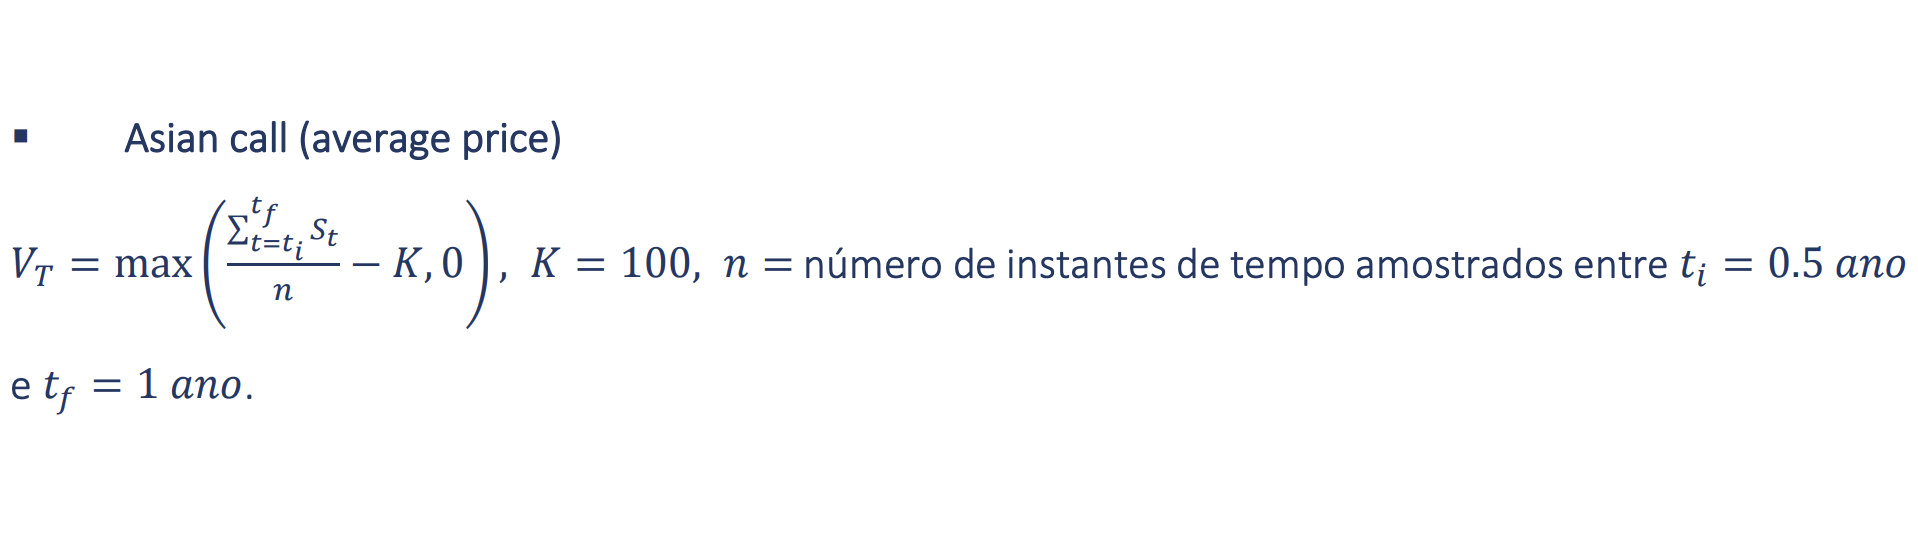

In [9]:
# strike price
K = 100

def payoff_asian_call(prices, strike_price):
    # average of the price path
    avg_price = np.mean(prices)
    # # calculate payoff
    payoff = max(avg_price - strike_price, 0)
    return payoff

In [10]:
# get n points of the price path, where n = 0.5*T
n = int(0.5 * len(gbm_paths_df)) # 364/2 points

# slice to get last n values
price_values = gbm_paths_df.iloc[-n:]

price_values.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
360,130.179880,74.060844,242.347372,122.568232,195.542073,152.875577,82.679737,157.088354,107.773363,112.443017,...,59.959217,82.369210,251.420307,100.397096,77.523077,66.886875,147.547056,268.098094,116.853078,155.220782
361,132.574998,71.717320,238.074426,122.451509,192.559266,153.106482,81.498385,156.235990,105.796736,114.159967,...,59.797022,81.193207,244.567923,98.177745,76.485673,68.674717,147.366717,264.967759,115.478862,151.059400
362,134.897256,69.903394,243.240525,119.833667,184.707459,156.656534,85.708241,160.887790,106.959580,112.333218,...,59.804432,79.509063,250.581391,97.109547,77.241780,68.641386,146.359325,260.696426,118.725788,148.919193
363,136.302154,70.022106,246.616737,121.345204,185.805364,158.885123,84.460278,160.399093,107.741440,111.317286,...,59.876033,80.247873,252.040440,98.864497,78.916945,67.626280,142.734407,259.314052,115.877263,147.948828
364,139.135036,69.543360,243.142139,116.312571,185.394112,160.428264,85.039259,163.778129,109.257877,112.801677,...,59.445795,79.500123,260.818369,102.383145,80.675031,68.178110,137.012338,256.811173,112.208363,146.679450


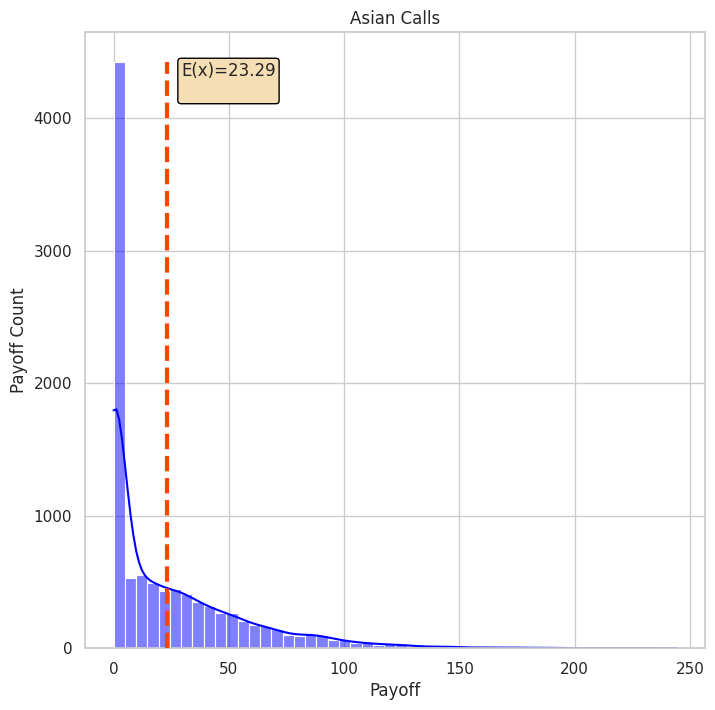

In [11]:
# calculate the payoff of asian call options
asian_payoffs = price_values.apply(lambda x: payoff_asian_call(x, K))

plot_histogram(asian_payoffs, 'Asian Calls')

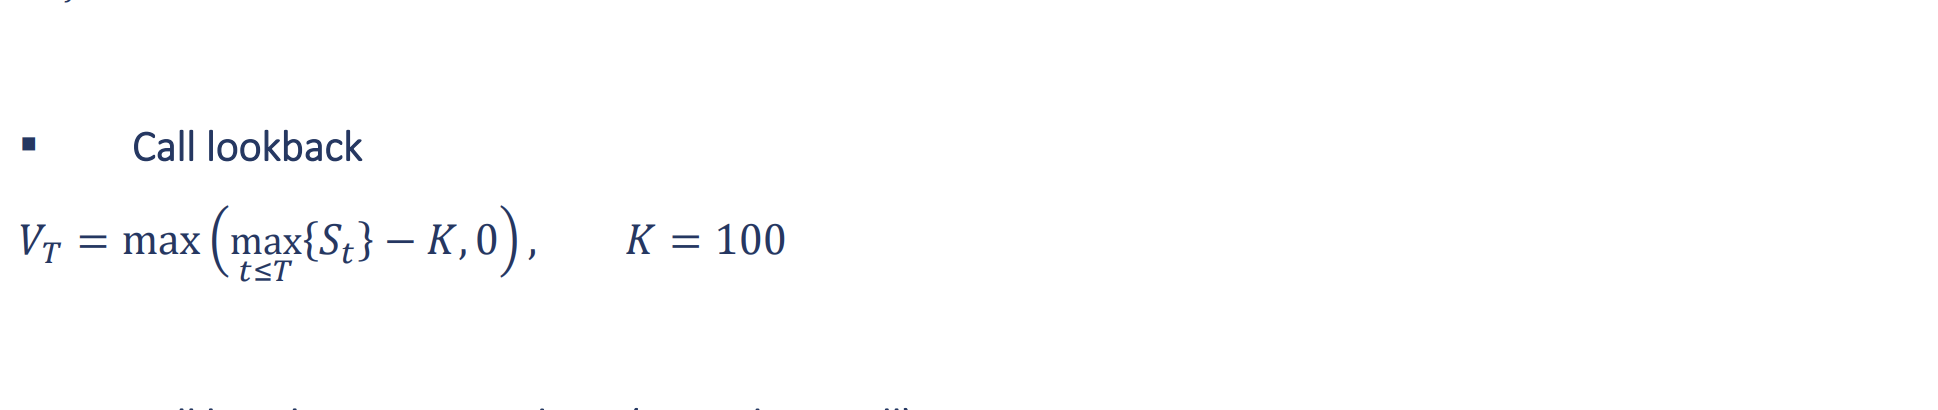

In [12]:
#strike price
K = 100

def payoff_lookback_call(prices, strike_price):
    # get the max of the price path
    max_price = max(prices)
    # calculate payoff between the max of the path and strike
    payoff = max(max_price - strike_price, 0)
    return payoff

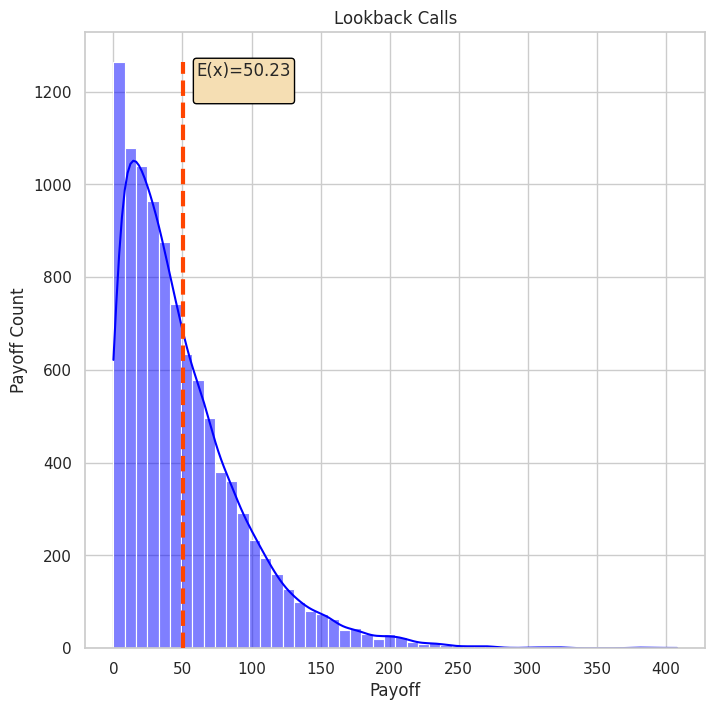

'Como o preço inicial é 100 e o strike é 100, max(St) >= 100, e o payoff será sempre >= 0'

In [13]:
# consider the whole price path
price_values = gbm_paths_df[1:]

# calculate payoffs
payoffs_lookback = price_values.apply(lambda x: payoff_lookback_call(x, K))

plot_histogram(payoffs_lookback, 'Lookback Calls')

'''Como o preço inicial é 100 e o strike é 100, max(St) >= 100, e o payoff será sempre >= 0'''


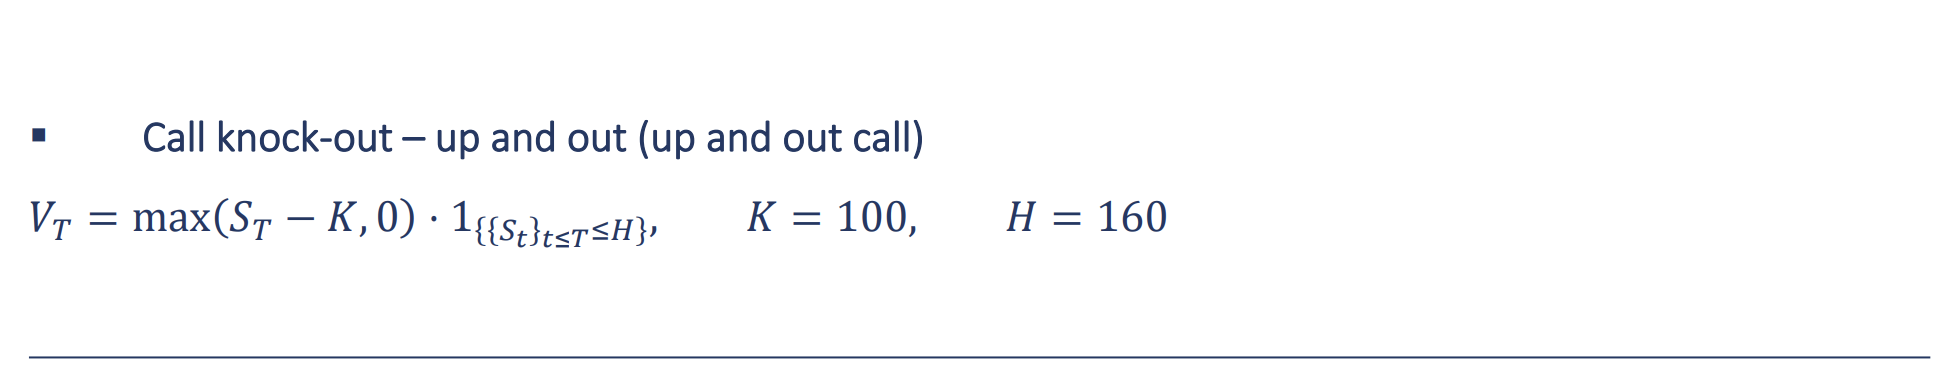

In [14]:
K = 100
barrier = 160

def payoff_call_up_and_out(prices, strike_price, barrier):
    # if at any point in the path we hit the upper barrier, 
    # the option payoff is 0
    if any(prices > barrier):
        return 0

    # otherwise the payoff is like a vanilla call option
    # get last price of path
    final_value = prices.iloc[-1]
    return max(final_value - strike_price, 0)

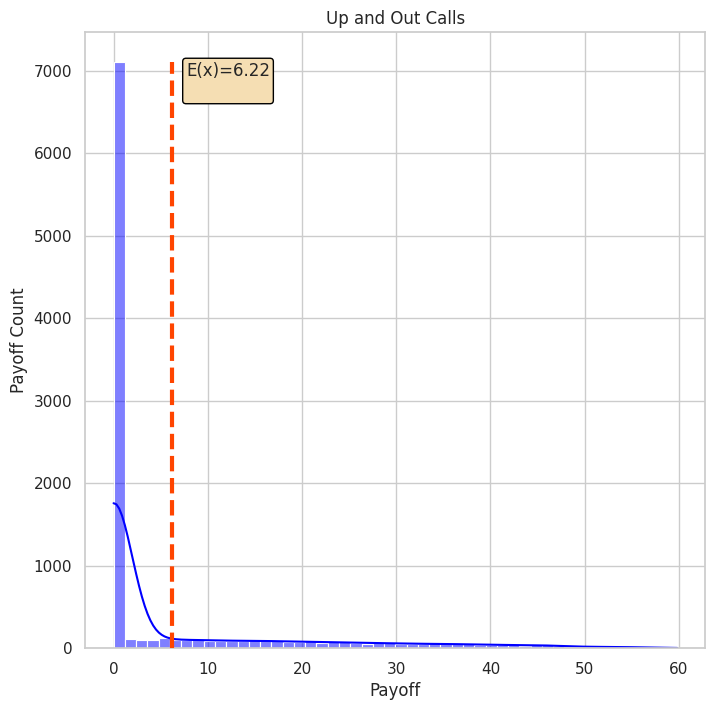

In [15]:
price_values = gbm_paths_df
payoffs_up_and_out = price_values.apply(lambda x: payoff_call_up_and_out(x, K, barrier))

plot_histogram(payoffs_up_and_out, 'Up and Out Calls')